In [26]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit.quantum_info import random_statevector

In [24]:
psi = random_statevector(2)
array_to_latex(psi)

<IPython.core.display.Latex object>

In [25]:
#Entangling qubits
def Entangling(qc,a,b) :
    qc.h(a)
    qc.cx(a,b)
    return qc

In [31]:
#reverse Entangling
def REntangling(qc,a,b) : 
    qc.cx(a,b)
    qc.h(a)
    return qc

In [27]:
def measuring(qc,a,b,crz,crx) : 
    qc.measure(a,crz)
    qc.measure(b,crx)
    return qc

In [39]:
def fixingBob(qc,b,crz,crx) : 
    qc.x(b).c_if(crx,1)
    qc.z(b).c_if(crz,1)
    return qc


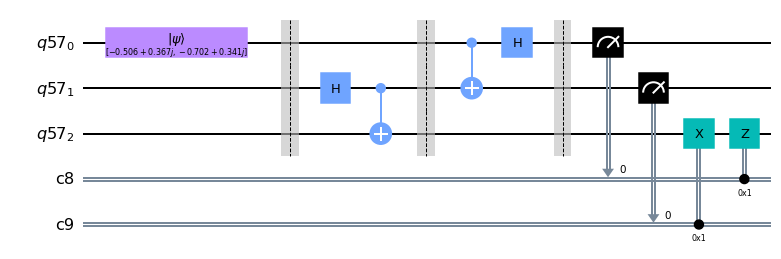

In [41]:
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
qc = QuantumCircuit(qr,crz,crx)
qc.initialize(psi,0)
qc.barrier()
qc = Entangling(qc,1,2)
qc.barrier()
qc = REntangling(qc,0,1)
qc.barrier()
qc = measuring(qc,0,1,0,1)
qc = fixingBob(qc,qr[2],crz,crx)
qc.draw('mpl')

C:\Users\Kais\anaconda3\envs\Qiskit\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


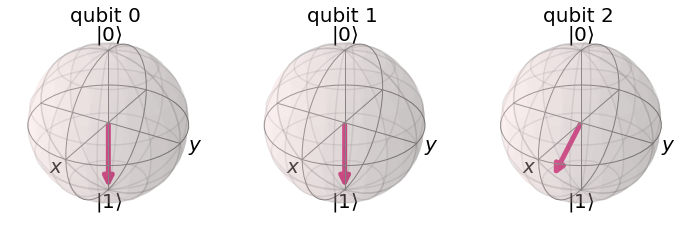

In [42]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc,backend).result().get_statevector(qc,decimals=3)
plot_bloch_multivector(job)

In [43]:
array_to_latex(job)

<IPython.core.display.Latex object>